# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
# Configuring url structure
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# set up lists to hold reponse info
city_name = []
lat = []
lng = []
temp = []
humidity = []
wind_speed = []
cloudiness = []

# setting up counter for printing log of city info
number = 1

# response = requests.get(query_url + city).json()
# temp.append(response['main']['temp'])
# latitude.append(response['coord']['lat'])
# latitude

# # Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        city_data = requests.get(query_url + city).json()
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp'])
        humidity.append(city_data['main']['humidity'])
        wind_speed.append(city_data['wind']['speed'])
        cloudiness.append(city_data['clouds']['all'])
        print(f'City number {number} of {len(cities)} complete. | Added {city}')
        number = number + 1
    except KeyError:
        print(f'There is missing data in city number {number} of {len(cities)}. | Skipping {city}')
        number = number + 1


City number 1 of 615 complete. | Added havre-saint-pierre
City number 2 of 615 complete. | Added tiksi
City number 3 of 615 complete. | Added bredasdorp
City number 4 of 615 complete. | Added hasaki
City number 5 of 615 complete. | Added tasiilaq
City number 6 of 615 complete. | Added busselton
City number 7 of 615 complete. | Added linguere
City number 8 of 615 complete. | Added kodiak
City number 9 of 615 complete. | Added cape town
City number 10 of 615 complete. | Added camacha
City number 11 of 615 complete. | Added hilo
City number 12 of 615 complete. | Added qaqortoq
City number 13 of 615 complete. | Added tiznit
City number 14 of 615 complete. | Added cururupu
City number 15 of 615 complete. | Added barinas
There is missing data in city number 16 of 615. | Skipping belushya guba
City number 17 of 615 complete. | Added avarua
City number 18 of 615 complete. | Added issoudun
City number 19 of 615 complete. | Added tucurui
City number 20 of 615 complete. | Added lakes entrance
Cit

City number 160 of 615 complete. | Added longyearbyen
City number 161 of 615 complete. | Added ranong
City number 162 of 615 complete. | Added la ronge
City number 163 of 615 complete. | Added antalaha
City number 164 of 615 complete. | Added vila franca do campo
City number 165 of 615 complete. | Added calvillo
City number 166 of 615 complete. | Added katsuura
There is missing data in city number 167 of 615. | Skipping samusu
City number 168 of 615 complete. | Added lakheri
City number 169 of 615 complete. | Added georgetown
City number 170 of 615 complete. | Added touros
City number 171 of 615 complete. | Added xuddur
City number 172 of 615 complete. | Added norman wells
City number 173 of 615 complete. | Added east london
City number 174 of 615 complete. | Added fushun
City number 175 of 615 complete. | Added kruisfontein
City number 176 of 615 complete. | Added mgandu
City number 177 of 615 complete. | Added singaraja
City number 178 of 615 complete. | Added kilemary
City number 17

City number 319 of 615 complete. | Added aykhal
City number 320 of 615 complete. | Added rapina
City number 321 of 615 complete. | Added mont-dore
City number 322 of 615 complete. | Added xinyu
City number 323 of 615 complete. | Added aksu
City number 324 of 615 complete. | Added marystown
City number 325 of 615 complete. | Added sao marcos
City number 326 of 615 complete. | Added alizai
City number 327 of 615 complete. | Added sao miguel do araguaia
City number 328 of 615 complete. | Added sibolga
City number 329 of 615 complete. | Added methoni
City number 330 of 615 complete. | Added tygda
City number 331 of 615 complete. | Added bose
City number 332 of 615 complete. | Added bubaque
City number 333 of 615 complete. | Added misratah
City number 334 of 615 complete. | Added harrisburg
City number 335 of 615 complete. | Added merauke
City number 336 of 615 complete. | Added khani
City number 337 of 615 complete. | Added conde
City number 338 of 615 complete. | Added gucheng
City number

City number 478 of 615 complete. | Added jatai
City number 479 of 615 complete. | Added lakota
City number 480 of 615 complete. | Added kamiiso
City number 481 of 615 complete. | Added dedougou
City number 482 of 615 complete. | Added prince george
City number 483 of 615 complete. | Added sitka
City number 484 of 615 complete. | Added tombouctou
City number 485 of 615 complete. | Added shelburne
City number 486 of 615 complete. | Added nemuro
City number 487 of 615 complete. | Added cooma
City number 488 of 615 complete. | Added nizhneangarsk
City number 489 of 615 complete. | Added luxor
City number 490 of 615 complete. | Added yar
City number 491 of 615 complete. | Added rehti
City number 492 of 615 complete. | Added point fortin
City number 493 of 615 complete. | Added kabala
There is missing data in city number 494 of 615. | Skipping samalaeulu
City number 495 of 615 complete. | Added saint-francois
City number 496 of 615 complete. | Added kommunisticheskiy
City number 497 of 615 c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
# Creating city data DF
city_data_dict = {"City": city_name, 
                "Latitude": lat,
                "Longitude": lng,
                "Temperature": temp, 
                "Humidity": humidity, 
                "Wind Speed": wind_speed,
                "Cloudiness": cloudiness}
city_data_df = pd.DataFrame(city_data_dict)

# Exporting city data to CSV
pd.DataFrame.to_csv(city_data_df, 'city_data_df.csv')

city_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,Havre-St-Pierre,50.23,-63.60,35.60,59,6.93,1
1,Tiksi,71.69,128.87,-18.00,83,6.82,0
2,Bredasdorp,-34.53,20.04,59.00,62,12.75,96
3,Hasaki,35.73,140.83,53.44,62,7.85,98
4,Tasiilaq,65.61,-37.64,15.44,96,4.63,98


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

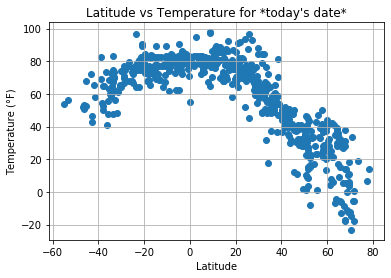

In [32]:
plt.scatter(lat, temp)
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.title("Latitude vs Temperature for *today's date*")
plt.grid(True)
plt.show()

#### Latitude vs. Humidity Plot

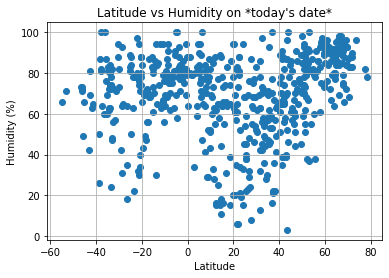

In [33]:
plt.scatter(lat, humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity on *today's date*")
plt.grid(True)
plt.show()

#### Latitude vs. Cloudiness Plot

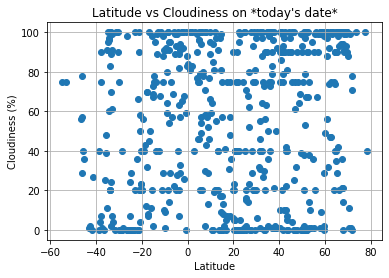

In [34]:
plt.scatter(lat, cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs Cloudiness on *today's date*")
plt.grid(True)
plt.show()

#### Latitude vs. Wind Speed Plot

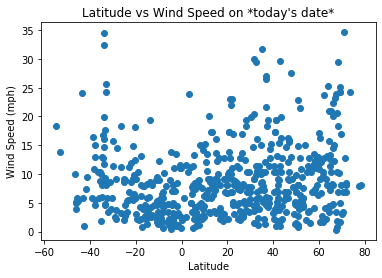

In [37]:
plt.scatter(lat, wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs Wind Speed on *today's date*")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [40]:
# Create Northern and Southern Hemisphere DataFrames

# North hemisphere DF: getting all rows with latitude over 0
north_hemi = city_data_df.loc[city_data_df["Latitude"] > 0]

# South hemisphere DF: getting all rows with latitude under 0
south_hemi = city_data_df.loc[city_data_df["Latitude"] < 0]


,City,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
2,Bredasdorp,-34.53,20.04,59.00,62,12.75,96
5,Busselton,-33.65,115.33,68.43,78,4.74,24
8,Cape Town,-33.93,18.42,60.80,63,16.11,20
13,Cururupu,-1.83,-44.87,79.05,86,4.47,92
15,Avarua,-21.21,-159.78,80.60,94,9.17,90


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

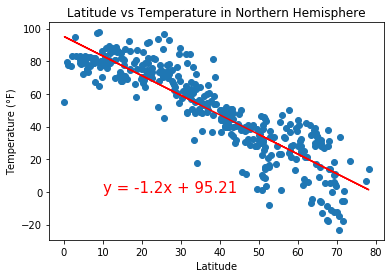

 The correlation coefficient is: 0.7893420011766425


In [68]:
nh_lat = north_hemi["Latitude"]
nh_temp = north_hemi["Temperature"]

# Setting up lin regression line
slope, intercept, rvalue, pvalue, stderr = linregress(nh_lat, nh_temp)
regression_value = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nh_lat, nh_temp)
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.title("Latitude vs Temperature in Northern Hemisphere")

# Adding linear regression line
plt.plot(nh_lat, regression_value,"r-")
plt.annotate(line_eq, (10,0), fontsize=15, color="r")


plt.show()

print(f" The correlation coefficient is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

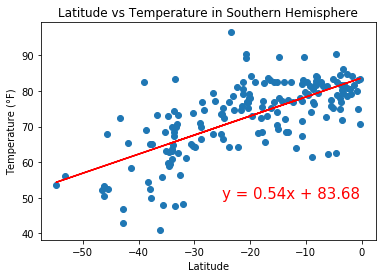

 The correlation coefficient is: 0.46490867299230576


In [67]:
sh_lat = south_hemi["Latitude"]
sh_temp = south_hemi["Temperature"]

# Setting up lin regression line
slope, intercept, rvalue, pvalue, stderr = linregress(sh_lat, sh_temp)
regression_value = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(sh_lat, sh_temp)
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.title("Latitude vs Temperature in Southern Hemisphere")

# Adding linear regression line
plt.plot(sh_lat, regression_value,"r-")
plt.annotate(line_eq, (-25,50), fontsize=15, color="r")


plt.show()

print(f" The correlation coefficient is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

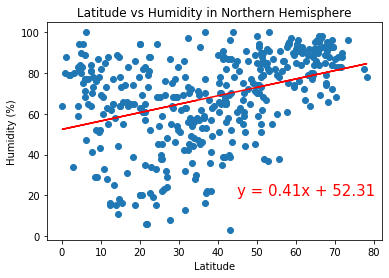

 The correlation coefficient is: 0.14284446605735168


In [71]:
nh_humidity = north_hemi["Humidity"]

# Setting up lin regression line
slope, intercept, rvalue, pvalue, stderr = linregress(nh_lat, nh_humidity)
regression_value = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nh_lat, nh_humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity in Northern Hemisphere")

# Adding linear regression line
plt.plot(nh_lat, regression_value,"r-")
plt.annotate(line_eq, (45,20), fontsize=15, color="r")

plt.show()

print(f" The correlation coefficient is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

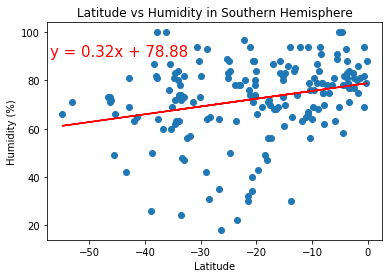

 The correlation coefficient is: 0.06811155302765624


In [81]:
sh_humidity = south_hemi["Humidity"]
slope, intercept, rvalue, pvalue, stderr = linregress(sh_lat, sh_humidity)

regression_value = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(sh_lat, sh_humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity in Southern Hemisphere")

# Adding linear regression line
plt.plot(sh_lat, regression_value,"r-")
plt.annotate(line_eq, (-57,90), fontsize=15, color="r")

plt.show()

print(f" The correlation coefficient is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

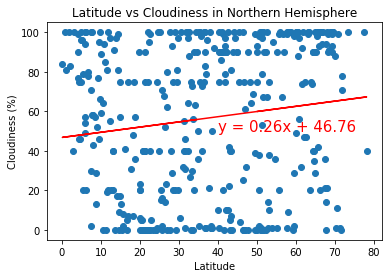

 The correlation coefficient is: 0.019301007028760215


In [84]:
nh_cloudiness = north_hemi["Cloudiness"]

# Setting up lin regression line
slope, intercept, rvalue, pvalue, stderr = linregress(nh_lat, nh_cloudiness)
regression_value = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nh_lat, nh_cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs Cloudiness in Northern Hemisphere")

# Adding linear regression line
plt.plot(nh_lat, regression_value,"r-")
plt.annotate(line_eq, (40,50), fontsize=15, color="r")

plt.show()

print(f" The correlation coefficient is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

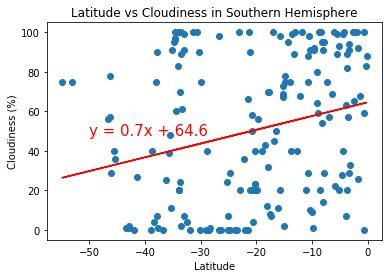

 The correlation coefficient is: 0.06312790615236155


In [92]:
sh_cloudiness = south_hemi["Cloudiness"]

# Setting up lin regression line
slope, intercept, rvalue, pvalue, stderr = linregress(sh_lat, sh_cloudiness)
regression_value = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(sh_lat, sh_cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs Cloudiness in Southern Hemisphere")

# Adding linear regression line
plt.plot(sh_lat, regression_value,"r-")
plt.annotate(line_eq, (-50,48), fontsize=15, color="r")

plt.show()

print(f" The correlation coefficient is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

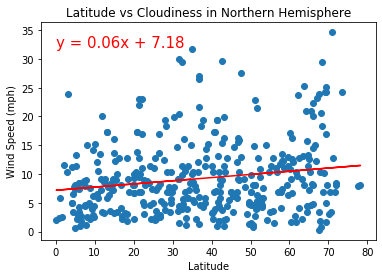

 The correlation coefficient is: 0.030559112106894864


In [110]:
nh_wind_speed = north_hemi["Wind Speed"]

# Setting up lin regression line
slope, intercept, rvalue, pvalue, stderr = linregress(nh_lat, nh_wind_speed)
regression_value = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nh_lat, nh_wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs Cloudiness in Northern Hemisphere")

# Adding linear regression line
plt.plot(nh_lat, regression_value,"r-")
plt.annotate(line_eq, (0,32), fontsize=15, color="r")

plt.show()

print(f" The correlation coefficient is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

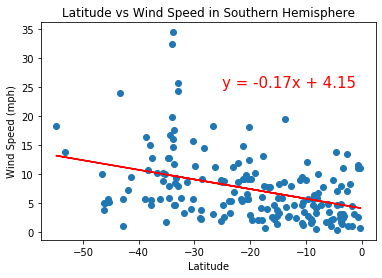

 The correlation coefficient is: 0.14754573287465894


In [114]:
sh_wind_speed = south_hemi["Wind Speed"]

# Setting up lin regression line
slope, intercept, rvalue, pvalue, stderr = linregress(sh_lat, sh_wind_speed)
regression_value = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(sh_lat, sh_wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs Wind Speed in Southern Hemisphere")

# Adding linear regression line
plt.plot(sh_lat, regression_value,"r-")
plt.annotate(line_eq, (-25,25), fontsize=15, color="r")

plt.show()

print(f" The correlation coefficient is: {rvalue**2}")
